<a href="https://colab.research.google.com/github/sarahwierzbicki/projects/blob/main/resume_parser_preprocessing_spacy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install scipy

In [ ]:
import os
import zipfile
import numpy as np
import pandas as pd
import keras
import cv2
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import re
import random

In [ ]:
import spacy
#en_core_web_sm is the english language model
nlp = spacy.load('en_core_web_sm')
stopwords = nlp.Defaults.stop_words
len(stopwords)

326

In [ ]:
!unzip Resume.zip

Archive:  Resume.zip
  inflating: Resume.csv              


In [ ]:
df = pd.read_csv('/content/Resume.csv')

In [ ]:
df

,ID,Resume_str,Resume_html,Category
0,16852973,HR ADMINISTRATOR/MARKETING ASSOCIATE\...,"<div class=""fontsize fontface vmargins hmargin...",HR
1,22323967,"HR SPECIALIST, US HR OPERATIONS ...","<div class=""fontsize fontface vmargins hmargin...",HR
2,33176873,HR DIRECTOR Summary Over 2...,"<div class=""fontsize fontface vmargins hmargin...",HR
3,27018550,HR SPECIALIST Summary Dedica...,"<div class=""fontsize fontface vmargins hmargin...",HR
4,17812897,HR MANAGER Skill Highlights ...,"<div class=""fontsize fontface vmargins hmargin...",HR
...,...,...,...,...
2479,99416532,RANK: SGT/E-5 NON- COMMISSIONED OFFIC...,"<div class=""fontsize fontface vmargins hmargin...",AVIATION
2480,24589765,"GOVERNMENT RELATIONS, COMMUNICATIONS ...","<div class=""fontsize fontface vmargins hmargin...",AVIATION
2481,31605080,GEEK SQUAD AGENT Professional...,"<div class=""fontsize fontface vmargins hmargin...",AVIATION
2482,21190805,PROGRAM DIRECTOR / OFFICE MANAGER ...,"<div class=""fontsize fontface vmargins hmargin...",AVIATION


data pre-processing

In [ ]:
#drop unneeded columns
df.drop('ID', axis = 1, inplace = True)
df.drop ('Resume_html', axis = 1, inplace = True)

In [ ]:
df.head(5)

,Resume_str,Category
0,HR ADMINISTRATOR/MARKETING ASSOCIATE\...,HR
1,"HR SPECIALIST, US HR OPERATIONS ...",HR
2,HR DIRECTOR Summary Over 2...,HR
3,HR SPECIALIST Summary Dedica...,HR
4,HR MANAGER Skill Highlights ...,HR


In [ ]:
df.info()
df['Resume_str']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2484 entries, 0 to 2483
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Resume_str  2484 non-null   object
 1   Category    2484 non-null   object
dtypes: object(2)
memory usage: 38.9+ KB


,Resume_str
0,HR ADMINISTRATOR/MARKETING ASSOCIATE\...
1,"HR SPECIALIST, US HR OPERATIONS ..."
2,HR DIRECTOR Summary Over 2...
3,HR SPECIALIST Summary Dedica...
4,HR MANAGER Skill Highlights ...
...,...
2479,RANK: SGT/E-5 NON- COMMISSIONED OFFIC...
2480,"GOVERNMENT RELATIONS, COMMUNICATIONS ..."
2481,GEEK SQUAD AGENT Professional...
2482,PROGRAM DIRECTOR / OFFICE MANAGER ...


In [ ]:
#drop duplicates
#only 2
resume = df.drop_duplicates()

In [ ]:
#strip leading and trailing spaces in resume_str column
resume['Resume_str'] = resume['Resume_str'].str.strip()

<ipython-input-12-2972495887>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  resume['Resume_str'] = resume['Resume_str'].str.strip()


In [ ]:
resume

,Resume_str,Category
0,HR ADMINISTRATOR/MARKETING ASSOCIATE\n\nHR ADM...,HR
1,"HR SPECIALIST, US HR OPERATIONS Summary ...",HR
2,HR DIRECTOR Summary Over 20 years e...,HR
3,"HR SPECIALIST Summary Dedicated, Driv...",HR
4,HR MANAGER Skill Highlights ...,HR
...,...,...
2478,ADVANCED LEVEL WHEELED VEHICLE MECHANIC ...,AVIATION
2479,RANK: SGT/E-5 NON- COMMISSIONED OFFICER IN CHA...,AVIATION
2480,"GOVERNMENT RELATIONS, COMMUNICATIONS AND ORGAN...",AVIATION
2481,GEEK SQUAD AGENT Professional Profile ...,AVIATION


In [ ]:
#normalize text (lowercase, no urls, special characters, stopwords)
def process(text):
  text = text.lower()
  url = re.compile(r'https?://\S+|www\.\S+')
  email = re.compile(r'\b[A-Za-z0-9._%+-]+@[A-Za-z0-9.-]+\.[A-Z|a-z]{2,}\b')
  clean_text = url.sub('', text)
  clean_text = email.sub('', clean_text)
  #only words and whitespace
  clean_text = re.sub('[^a-zA-Z]', ' ', text)
  #no stop words
  stop_words = stopwords
  clean_text = ' '.join(word for word in clean_text.split() if word.lower() not in stop_words)

  return clean_text

In [ ]:
df['Resume'] = df['Resume_str'].apply(lambda w: process(w))

In [ ]:
df_test = df['Resume'][1]
print(df_test)

hr specialist hr operations summary versatile media professional background communications marketing human resources technology experience current hr specialist hr operations company city state managed communication launch operations group policy changes system outages designed standard work job aids create comprehensive training program new employees contractors audited job postings old pending hold draft positions audited union hourly non union hourly salary background checks drug screens conducted monthly new hire benefits briefing new employees business units served link hr managers vendors handling questions resolving system related issues provide real time process improvement feedback key metrics initiatives successfully branded hr operations sharepoint site business unit project manager rfi rfp background check drug screen vendor marketing communications co op company city state posted new articles changes updates corporate sharepoint site including graphics visual communication

In [ ]:
df

,Resume_str,Category,Resume
0,HR ADMINISTRATOR/MARKETING ASSOCIATE\...,HR,hr administrator marketing associate hr admini...
1,"HR SPECIALIST, US HR OPERATIONS ...",HR,hr specialist hr operations summary versatile ...
2,HR DIRECTOR Summary Over 2...,HR,hr director summary years experience recruitin...
3,HR SPECIALIST Summary Dedica...,HR,hr specialist summary dedicated driven dynamic...
4,HR MANAGER Skill Highlights ...,HR,hr manager skill highlights hr skills hr depar...
...,...,...,...
2479,RANK: SGT/E-5 NON- COMMISSIONED OFFIC...,AVIATION,rank sgt e non commissioned officer charge bri...
2480,"GOVERNMENT RELATIONS, COMMUNICATIONS ...",AVIATION,government relations communications organizati...
2481,GEEK SQUAD AGENT Professional...,AVIATION,geek squad agent professional profile support ...
2482,PROGRAM DIRECTOR / OFFICE MANAGER ...,AVIATION,program director office manager summary highly...


In [ ]:
df.pop('Resume_str')

,Resume_str
0,HR ADMINISTRATOR/MARKETING ASSOCIATE\...
1,"HR SPECIALIST, US HR OPERATIONS ..."
2,HR DIRECTOR Summary Over 2...
3,HR SPECIALIST Summary Dedica...
4,HR MANAGER Skill Highlights ...
...,...
2479,RANK: SGT/E-5 NON- COMMISSIONED OFFIC...
2480,"GOVERNMENT RELATIONS, COMMUNICATIONS ..."
2481,GEEK SQUAD AGENT Professional...
2482,PROGRAM DIRECTOR / OFFICE MANAGER ...


In [ ]:
df.head()

,Category,Resume
0,HR,hr administrator marketing associate hr admini...
1,HR,hr specialist hr operations summary versatile ...
2,HR,hr director summary years experience recruitin...
3,HR,hr specialist summary dedicated driven dynamic...
4,HR,hr manager skill highlights hr skills hr depar...


examine spacy pipeline
nlp.pipe_names

In [ ]:
nlp.pipe_names

['tok2vec', 'tagger', 'parser', 'attribute_ruler', 'lemmatizer', 'ner']

In [ ]:
from collections import Counter

get keywords


In [ ]:
spacy_doc = nlp(text)

In [ ]:
def get_keyphrases(text):
  key_phrases = []
  doc = nlp(text)
  for chunk in spacy_doc.noun_chunks:
    key_phrases.append(chunk.text)
  return key_phrases

In [ ]:
def get_keywords(text):
  result = []
  pos_tag = ['PROPN', 'ADJ', 'NOUN']
  doc = nlp(text)
  for token in doc:
    #if(token.text in nlp.Defaults.stop_words or token.text in punctuation):
      #continue
    if(token.pos_ in pos_tag):
      result.append(token.text)
  return result

In [ ]:
output = set(get_keywords(text))
list = Counter(output).most_common(10)
for item in list:
  print(item[0])

promotional
variety
connecticut
question
postings
issues
customers
visual
city
approval


In [ ]:
print(output)

{'promotional', 'variety', 'connecticut', 'question', 'postings', 'issues', 'customers', 'visual', 'city', 'approval', 'producer', 'team', 'graphic', 'efficiency', 'post', 'topics', 'website', 'sales', 'head', 'business', 'development', 'advertising', 'marketing', 'professionals', 'meetings', 'co', 'background', 'screens', 'reception', 'quality', 'executive', 'job', 'relationship', 'stories', 'pro', 'solutions', 'board', 'tellers', 'site', 'photoshop', 'heart', 'grand', 'appointments', 'distribution', 'initiatives', 'cut', 'work', 'daily', 'asset', 'articles', 'trade', 'machines', 'conversation', 'skills', 'service', 'tradeshows', 'technology', 'program', 'programs', 'policy', 'versatile', 'teams', 'bachelor', 'audit', 'communication', 'guests', 'calendar', 'sacred', 'standard', 'awareness', 'print', 'needs', 'material', 'locations', 'feedback', 'panel', 'microsoft', 'operations', 'shows', 'improvement', 'content', 'opportunities', 'external', 'high', 'positions', 'mysikorsky', 'teller

In [ ]:
#use on reume_str column

In [ ]:
df['key_words'] = df['Resume'].apply(get_keywords)

In [ ]:
df['key_phrases'] = df['Resume'].apply(get_keyphrases)

In [ ]:
df

,Category,Resume,key_words,key_phrases
0,19,hr administrator marketing associate hr admini...,"[hr, administrator, marketing, associate, hr, ...","[hr specialist hr operations, human resources ..."
1,19,hr specialist hr operations summary versatile ...,"[hr, specialist, hr, operations, versatile, me...","[hr specialist hr operations, human resources ..."
2,19,hr director summary years experience recruitin...,"[hr, director, summary, years, experience, rec...","[hr specialist hr operations, human resources ..."
3,19,hr specialist summary dedicated driven dynamic...,"[hr, specialist, summary, dynamic, years, cust...","[hr specialist hr operations, human resources ..."
4,19,hr manager skill highlights hr skills hr depar...,"[hr, manager, skill, highlights, hr, hr, depar...","[hr specialist hr operations, human resources ..."
...,...,...,...,...
2479,6,rank sgt e non commissioned officer charge bri...,"[rank, sgt, e, officer, charge, brigade, mail,...","[hr specialist hr operations, human resources ..."
2480,6,government relations communications organizati...,"[government, relations, communications, organi...","[hr specialist hr operations, human resources ..."
2481,6,geek squad agent professional profile support ...,"[geek, squad, agent, professional, profile, su...","[hr specialist hr operations, human resources ..."
2482,6,program director office manager summary highly...,"[program, director, office, manager, personabl...","[hr specialist hr operations, human resources ..."


<Axes: xlabel='Category'>

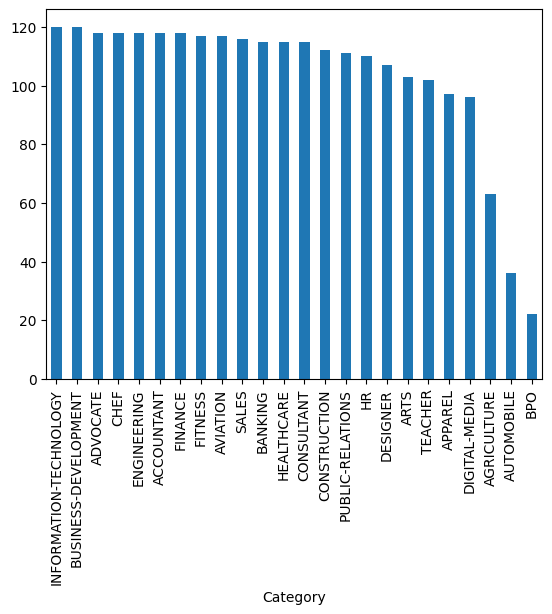

In [ ]:
df['Category'].value_counts().plot(kind='bar')

In [ ]:
df['Category'].value_counts()

,count
Category,
INFORMATION-TECHNOLOGY,120
BUSINESS-DEVELOPMENT,120
ADVOCATE,118
CHEF,118
ENGINEERING,118
ACCOUNTANT,118
FINANCE,118
FITNESS,117
AVIATION,117


In [ ]:
#label encode categories
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
for column in df.columns:
  df['Category'] = le.fit_transform(df['Category'])
df

,Category,Resume,key_words,key_phrases
0,19,hr administrator marketing associate hr admini...,"[hr, administrator, marketing, associate, hr, ...","[hr specialist hr operations, human resources ..."
1,19,hr specialist hr operations summary versatile ...,"[hr, specialist, hr, operations, versatile, me...","[hr specialist hr operations, human resources ..."
2,19,hr director summary years experience recruitin...,"[hr, director, summary, years, experience, rec...","[hr specialist hr operations, human resources ..."
3,19,hr specialist summary dedicated driven dynamic...,"[hr, specialist, summary, dynamic, years, cust...","[hr specialist hr operations, human resources ..."
4,19,hr manager skill highlights hr skills hr depar...,"[hr, manager, skill, highlights, hr, hr, depar...","[hr specialist hr operations, human resources ..."
...,...,...,...,...
2479,6,rank sgt e non commissioned officer charge bri...,"[rank, sgt, e, officer, charge, brigade, mail,...","[hr specialist hr operations, human resources ..."
2480,6,government relations communications organizati...,"[government, relations, communications, organi...","[hr specialist hr operations, human resources ..."
2481,6,geek squad agent professional profile support ...,"[geek, squad, agent, professional, profile, su...","[hr specialist hr operations, human resources ..."
2482,6,program director office manager summary highly...,"[program, director, office, manager, personabl...","[hr specialist hr operations, human resources ..."


In [ ]:
model_df = df.drop('Resume', axis = 1)

In [ ]:
model_df

,Category,key_words,key_phrases
0,19,"[hr, administrator, marketing, associate, hr, ...","[hr specialist hr operations, human resources ..."
1,19,"[hr, specialist, hr, operations, versatile, me...","[hr specialist hr operations, human resources ..."
2,19,"[hr, director, summary, years, experience, rec...","[hr specialist hr operations, human resources ..."
3,19,"[hr, specialist, summary, dynamic, years, cust...","[hr specialist hr operations, human resources ..."
4,19,"[hr, manager, skill, highlights, hr, hr, depar...","[hr specialist hr operations, human resources ..."
...,...,...,...
2479,6,"[rank, sgt, e, officer, charge, brigade, mail,...","[hr specialist hr operations, human resources ..."
2480,6,"[government, relations, communications, organi...","[hr specialist hr operations, human resources ..."
2481,6,"[geek, squad, agent, professional, profile, su...","[hr specialist hr operations, human resources ..."
2482,6,"[program, director, office, manager, personabl...","[hr specialist hr operations, human resources ..."
